In [116]:
import pandas as pd
import numpy as np

In [117]:
df = pd.read_csv('BikeSharing.csv')

In [118]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [119]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [120]:
df.shape

(730, 16)

In [121]:
#check for null values
df.isnull().sum()
# No null values found to impute 

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [122]:
# Dropping unused columns
unused_columns = ['dteday','casual','registered','instant']
df.drop(unused_columns,axis='columns', inplace=True)

In [123]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [124]:
df.nunique()
# unique values discovered 

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [125]:
%pip install seaborn

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.5 KB


In [128]:
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity','dteday':'date','cnt':'count'}, inplace=True)

In [129]:
num_col=['season','year','month','holiday','weekday','workingday','weathersit','temp','atemp','humidity','windspeed']


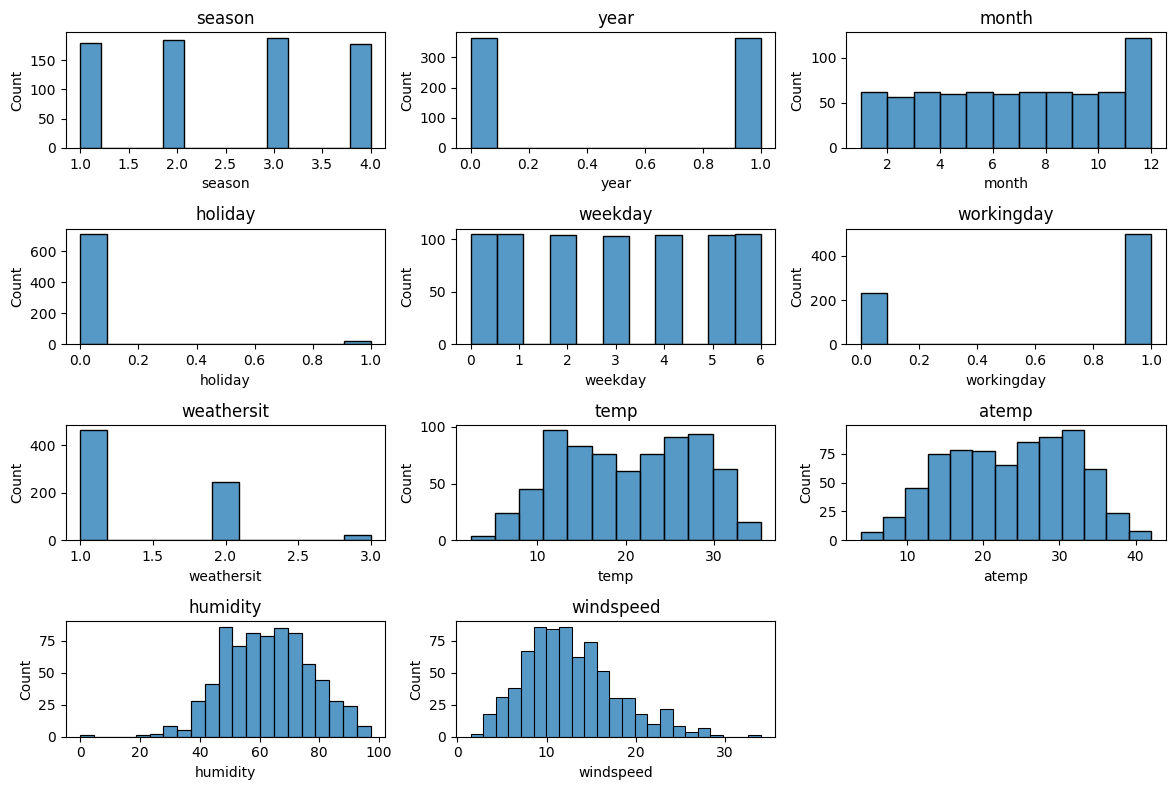

In [130]:
import math
num_columns = len(num_col)

# Calculate the size of the grid
grid_size = math.ceil(math.sqrt(num_columns))

fig, axs = plt.subplots(4, 3, figsize=(grid_size * 3, grid_size * 2))

# Flatten the axes array for easy iteration
axs = axs.flatten()

for i, column in enumerate(num_col):
    sns.histplot(df[column], ax=axs[i])
    axs[i].set_title(column)

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

season 0
year 1
month 2
holiday 3
weekday 4
workingday 5
weathersit 6


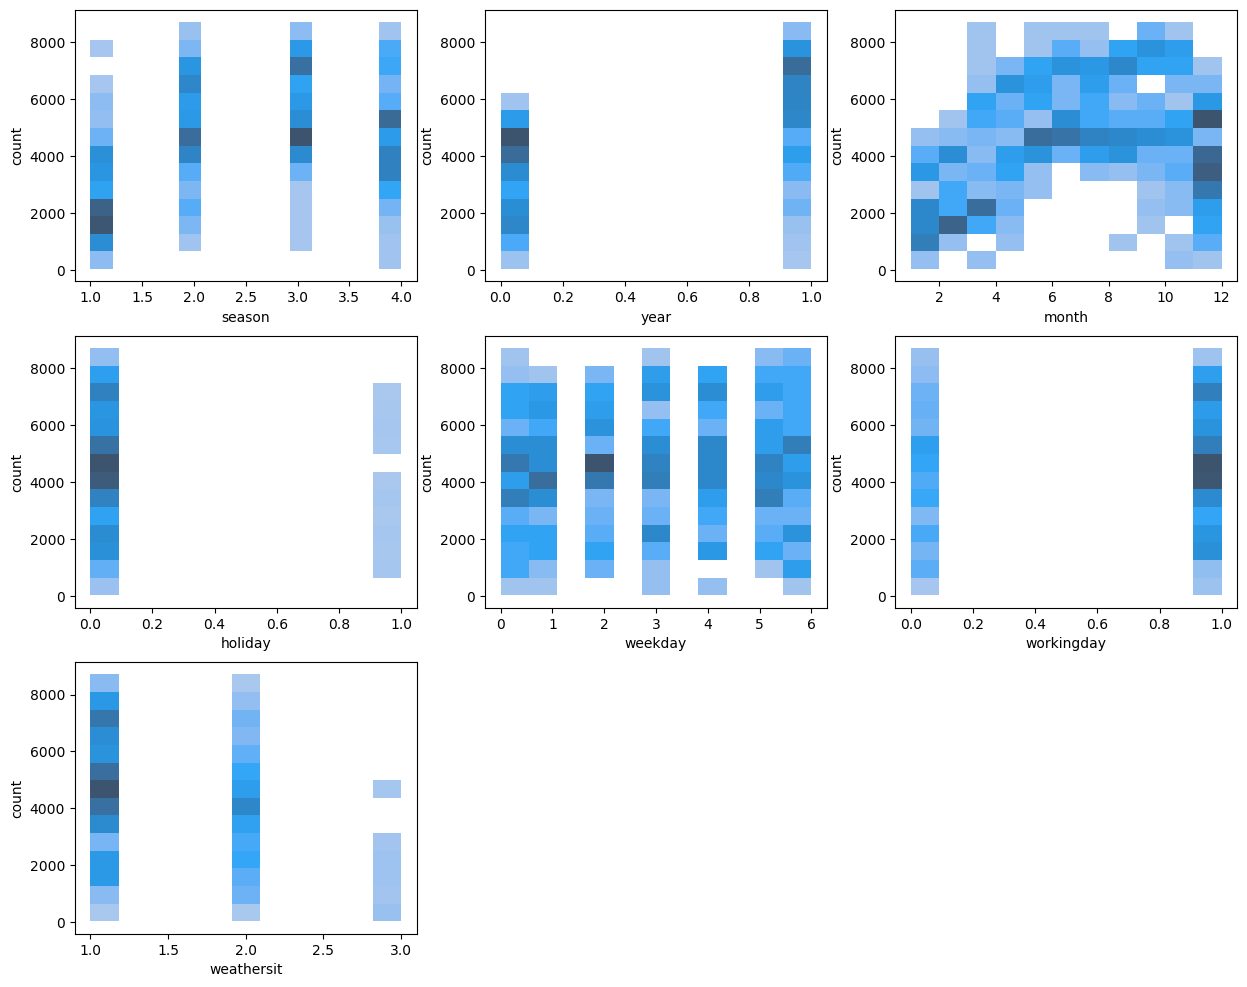

In [131]:
# Box Plot 
plt.figure(figsize=(15,12))
j=0
for i in num_col[:-4]:
    print (i,j)
    j = j + 1
    plt.subplot(3,3,j)
    sns.histplot(x=i,y='count',data=df)

season 0
year 1
month 2
holiday 3
weekday 4
workingday 5
weathersit 6


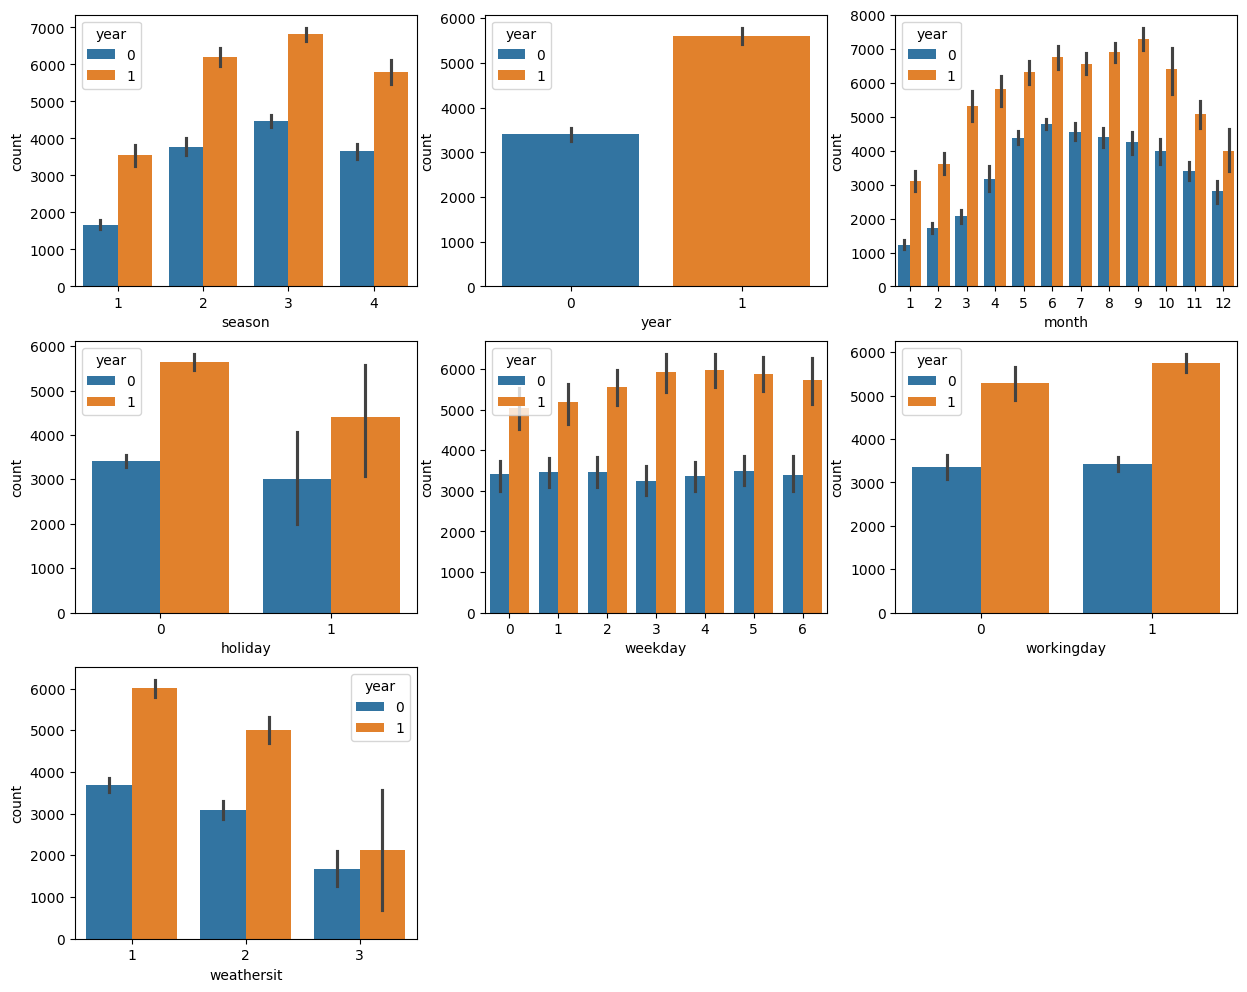

In [132]:
# Box Plot 
plt.figure(figsize=(15,12))
j=0
for i in num_col[:-4]:
    print (i,j)
    j = j + 1
    plt.subplot(3,3,j)
    sns.barplot(x=i,y='count',data=df,hue='year')

season 0
year 1
month 2
holiday 3
weekday 4
workingday 5
weathersit 6


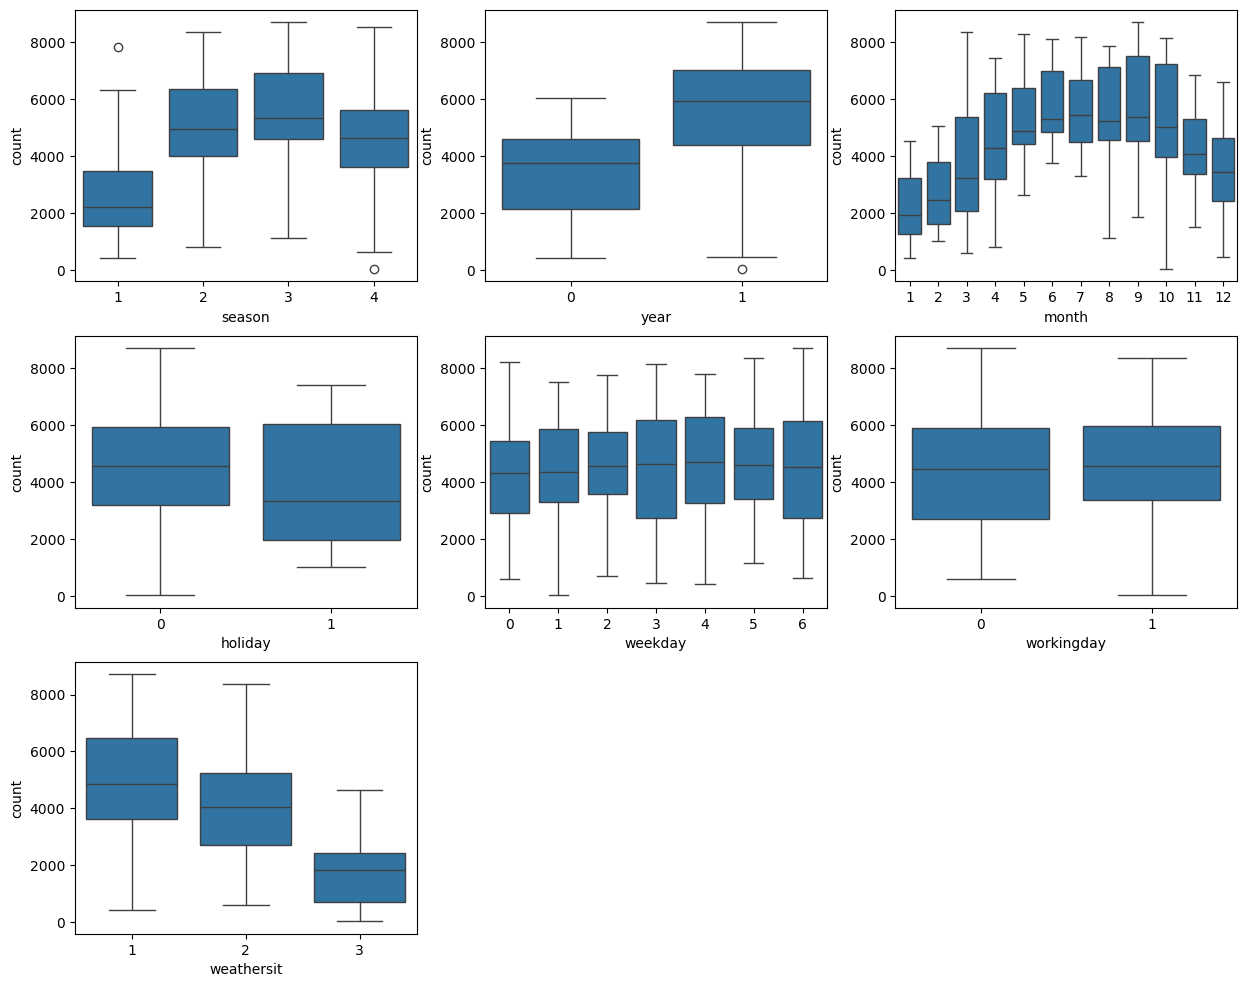

In [133]:
# Box Plot 
plt.figure(figsize=(15,12))
j=0
for i in num_col[:-4]:
    print (i,j)
    j = j + 1
    plt.subplot(3,3,j)
    sns.boxplot(x=i,y='count',data=df)

<AxesSubplot:>

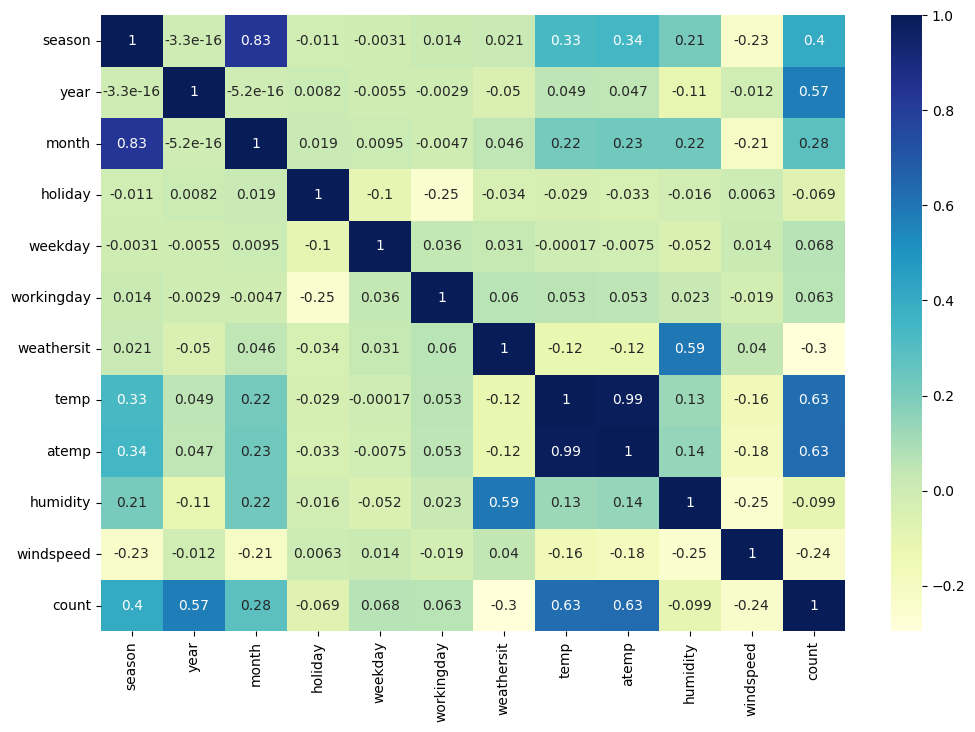

In [134]:
#checking correlation 
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(data=df.corr(),annot=True, cmap="YlGnBu")

In [135]:
#renaming the values 
# Months
df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# Season
df.season.replace((1,2,3,4), ('spring', 'summer', 'fall', 'winter'), inplace = True)

# Weathersit
df.weathersit.replace((1,2,3,4), ('clear','misty','light_rainsnow','heavy_rainsnow'), inplace=True)

# Weekday
df.weekday.replace((0,1,2,3,4,5,6), ('sunday','monday','tuesday','wednesday','thursday','friday','saturday'), inplace=True)

# df.weekday.value_counts()

In [136]:
# Creating Variable for categorical values
months=pd.get_dummies(df.month,drop_first=True)
seasons=pd.get_dummies(df.season,drop_first=True)
weekdays=pd.get_dummies(df.weekday,drop_first=True)
weather_sit=pd.get_dummies(df.weathersit,drop_first=True)

### Merging the 
df=pd.concat([months,weekdays,weather_sit,seasons,df],axis=1)
df.drop(['month', 'weekday', 'weathersit', 'season'], axis = 1, inplace = True)
df.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,summer,winter,year,holiday,workingday,temp,atemp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [137]:
df.shape

(730, 30)

In [138]:
# df2.info()

In [139]:
#BUILD ML
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df,train_size = 0.75, random_state=100)
# df_test.shape
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 547 entries, 311 to 520
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Aug             547 non-null    uint8  
 1   Dec             547 non-null    uint8  
 2   Feb             547 non-null    uint8  
 3   Jan             547 non-null    uint8  
 4   Jul             547 non-null    uint8  
 5   Jun             547 non-null    uint8  
 6   Mar             547 non-null    uint8  
 7   May             547 non-null    uint8  
 8   Nov             547 non-null    uint8  
 9   Oct             547 non-null    uint8  
 10  Sep             547 non-null    uint8  
 11  monday          547 non-null    uint8  
 12  saturday        547 non-null    uint8  
 13  sunday          547 non-null    uint8  
 14  thursday        547 non-null    uint8  
 15  tuesday         547 non-null    uint8  
 16  wednesday       547 non-null    uint8  
 17  light_rainsnow  547 non-null    u

In [140]:
# df_test.head()
# df_train.head()
# df_test.nunique()
df_train.shape[0]/df.shape[0]
df_train.describe()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,summer,winter,year,holiday,workingday,temp,atemp,humidity,windspeed,count
count,547.000000,547.000000,547.000000,547.00000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,...,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,0.093236,0.087751,0.073126,0.08958,0.071298,0.078611,0.096892,0.084095,0.082267,0.087751,...,0.244973,0.244973,0.508227,0.027422,0.669104,20.045868,23.433400,63.142410,12.786108,4466.930530
std,0.291029,0.283192,0.260582,0.28584,0.257557,0.269376,0.296082,0.277784,0.275022,0.283192,...,0.430465,0.430465,0.500390,0.163460,0.470966,7.418090,8.067299,14.023933,5.274442,1955.770315
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.512923,16.382200,52.291650,9.000311,3068.000000
50%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,20.055847,23.831900,63.583300,12.000236,4492.000000
75%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,26.615847,30.177700,73.083350,15.729523,5956.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000


In [141]:
#scaling values which are not in range 0 to 1
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()

In [142]:
num_vars = ['temp','atemp','humidity','windspeed','count']
df_train[num_vars] = minMaxScaler.fit_transform(df_train[num_vars])
df_train[num_vars].head()

,temp,atemp,humidity,windspeed,count
311,0.435124,0.437339,0.743667,0.057471,0.481247
523,0.735215,0.680985,0.482181,0.286093,0.887483
381,0.391151,0.374375,0.737917,0.659615,0.335136
413,0.358285,0.362754,0.550880,0.319514,0.494248
253,0.740406,0.695906,0.735509,0.156398,0.578003


In [143]:
df_train.describe()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,summer,winter,year,holiday,workingday,temp,atemp,humidity,windspeed,count
count,547.000000,547.000000,547.000000,547.00000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,...,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,0.093236,0.087751,0.073126,0.08958,0.071298,0.078611,0.096892,0.084095,0.082267,0.087751,...,0.244973,0.244973,0.508227,0.027422,0.669104,0.535543,0.511400,0.650673,0.319317,0.511382
std,0.291029,0.283192,0.260582,0.28584,0.257557,0.269376,0.296082,0.277784,0.275022,0.283192,...,0.430465,0.430465,0.500390,0.163460,0.470966,0.225446,0.211788,0.144515,0.169239,0.225008
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.336998,0.326287,0.538858,0.197844,0.350437
50%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.535847,0.521862,0.655216,0.294101,0.514266
75%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.753113,0.413761,0.682697
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [144]:
y_train = df_train.pop('count')
X_train = df_train
df_train.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,atemp,humidity,windspeed
311,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0.435124,0.437339,0.743667,0.057471
523,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0.735215,0.680985,0.482181,0.286093
381,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,1,0.391151,0.374375,0.737917,0.659615
413,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0.358285,0.362754,0.550880,0.319514
253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.740406,0.695906,0.735509,0.156398


In [145]:
# Doing feature selection from RFE

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=12)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Aug', False, 13),
 ('Dec', False, 6),
 ('Feb', False, 8),
 ('Jan', False, 7),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 18),
 ('May', False, 12),
 ('Nov', False, 5),
 ('Oct', False, 15),
 ('Sep', False, 2),
 ('monday', False, 10),
 ('saturday', True, 1),
 ('sunday', True, 1),
 ('thursday', False, 16),
 ('tuesday', False, 11),
 ('wednesday', False, 17),
 ('light_rainsnow', True, 1),
 ('misty', False, 3),
 ('spring', True, 1),
 ('summer', False, 4),
 ('winter', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [146]:
#selected features
X_train.columns[rfe.support_]

Index(['Jul', 'saturday', 'sunday', 'light_rainsnow', 'spring', 'winter',
       'year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed'],
      dtype='object')

In [147]:
#Columns where RFE support is False / rejected
X_train.columns[~rfe.support_]


Index(['Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       'monday', 'thursday', 'tuesday', 'wednesday', 'misty', 'summer',
       'atemp'],
      dtype='object')

In [148]:
# Building new model based on supported vars with RFE columsns
col = X_train.columns[rfe.support_] 
X_train_rfe = X_train[col]

In [149]:
X_train_rfe.head()

,Jul,saturday,sunday,light_rainsnow,spring,winter,year,holiday,workingday,temp,humidity,windspeed
311,0,0,0,0,0,1,0,0,1,0.435124,0.743667,0.057471
523,0,0,0,0,0,0,1,0,1,0.735215,0.482181,0.286093
381,0,0,0,0,1,0,1,0,1,0.391151,0.737917,0.659615
413,0,1,0,0,1,0,1,0,0,0.358285,0.550880,0.319514
253,0,0,1,0,0,0,0,0,0,0.740406,0.735509,0.156398


In [150]:
import statsmodels.api as sm
# X_train_rfe = sm.add_constant(X_train_rfe) ## Adding a constant
X_train_rfe.head()

,Jul,saturday,sunday,light_rainsnow,spring,winter,year,holiday,workingday,temp,humidity,windspeed
311,0,0,0,0,0,1,0,0,1,0.435124,0.743667,0.057471
523,0,0,0,0,0,0,1,0,1,0.735215,0.482181,0.286093
381,0,0,0,0,1,0,1,0,1,0.391151,0.737917,0.659615
413,0,1,0,0,1,0,1,0,0,0.358285,0.550880,0.319514
253,0,0,1,0,0,0,0,0,0,0.740406,0.735509,0.156398


In [151]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# X_train_rfe = X_train_rfe.drop(['const'],axis=1)
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,workingday,38.22
2,sunday,9.37
1,saturday,9.32
9,temp,2.83
4,spring,2.63
7,holiday,2.55
5,winter,1.73
10,humidity,1.25
0,Jul,1.24
11,windspeed,1.14


In [152]:
X_train_rfe = X_train_rfe.drop('workingday',axis=1)
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     242.8
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          7.05e-200
Time:                        22:56:18   Log-Likelihood:                 529.99
No. Observations:                 547   AIC:                            -1036.
Df Residuals:                     535   BIC:                            -984.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3751      0.030     12.502      0.000       0.316       0.434
Jul               -0.0916      0.017     -5.338      0.000      -0.125      -0.058
saturday           0.0082      0.011      0.722      0.471      -0.014       0.030
sunday            -0.0399      0.011     -3.521      0.000      -0.062      -0.018
light_rainsnow    -0.2012      0.026     -7.873      0.000      -0.251      -0.151
spring            -0.1058      0.015     -7.186      0.000      -0.135      -0.077
winter             0.0676      0.012      5.568      0.000       0.044       0.091
year               0.2256      0.008     28.046      0.000       0.210       0.241
holiday           -0.1106      0.025     -4.489      0.000      -0.159      -0.062
temp               0.5328      0.030     17.966      0.000       0.475       0.591
humidity          -0.2636      0.031     -8.590      0.000      -0.324      -0.203
windspeed         -0.1930      0.025     -7.704      0.000      -0.242      -0.144
==============================================================================
Omnibus:                       59.030   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.959
Skew:                          -0.628   Prob(JB):                     8.94e-27
Kurtosis:                       4.919   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [153]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,humidity,15.52
8,temp,12.84
10,windspeed,4.01
4,spring,2.51
6,year,2.05
5,winter,1.96
0,Jul,1.33
1,saturday,1.23
2,sunday,1.23
3,light_rainsnow,1.11


In [154]:
X_train_rfe = X_train_rfe.drop('humidity',axis=1)
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     228.7
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          4.09e-186
Time:                        22:56:29   Log-Likelihood:                 494.65
No. Observations:                 547   AIC:                            -967.3
Df Residuals:                     536   BIC:                            -920.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2091      0.024      8.550      0.000       0.161       0.257
Jul               -0.0715      0.018     -3.945      0.000      -0.107      -0.036
saturday           0.0109      0.012      0.900      0.369      -0.013       0.035
sunday            -0.0402      0.012     -3.333      0.001      -0.064      -0.017
light_rainsnow    -0.2581      0.026     -9.814      0.000      -0.310      -0.206
spring            -0.1085      0.016     -6.915      0.000      -0.139      -0.078
winter             0.0531      0.013      4.142      0.000       0.028       0.078
year               0.2320      0.009     27.179      0.000       0.215       0.249
holiday           -0.1063      0.026     -4.047      0.000      -0.158      -0.055
temp               0.4921      0.031     15.774      0.000       0.431       0.553
windspeed         -0.1398      0.026     -5.406      0.000      -0.191      -0.089
==============================================================================
Omnibus:                       69.650   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.056
Skew:                          -0.740   Prob(JB):                     1.73e-30
Kurtosis:                       4.956   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [155]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,4.04
9,windspeed,3.98
6,year,2.05
4,spring,1.68
5,winter,1.39
0,Jul,1.27
1,saturday,1.22
2,sunday,1.22
3,light_rainsnow,1.06
7,holiday,1.06


In [156]:
##VIF is low enough 

In [157]:
X_train_lm = sm.add_constant(X_train_rfe)
# Create a final model
lm = sm.OLS(y_train, X_train_lm).fit()

In [158]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     228.7
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          4.09e-186
Time:                        22:56:51   Log-Likelihood:                 494.65
No. Observations:                 547   AIC:                            -967.3
Df Residuals:                     536   BIC:                            -920.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2091      0.024      8.550      0.000       0.161       0.257
Jul               -0.0715      0.018     -3.945      0.000      -0.107      -0.036
saturday           0.0109      0.012      0.900      0.369      -0.013       0.035
sunday            -0.0402      0.012     -3.333      0.001      -0.064      -0.017
light_rainsnow    -0.2581      0.026     -9.814      0.000      -0.310      -0.206
spring            -0.1085      0.016     -6.915      0.000      -0.139      -0.078
winter             0.0531      0.013      4.142      0.000       0.028       0.078
year               0.2320      0.009     27.179      0.000       0.215       0.249
holiday           -0.1063      0.026     -4.047      0.000      -0.158      -0.055
temp               0.4921      0.031     15.774      0.000       0.431       0.553
windspeed         -0.1398      0.026     -5.406      0.000      -0.191      -0.089
==============================================================================
Omnibus:                       69.650   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.056
Skew:                          -0.740   Prob(JB):                     1.73e-30
Kurtosis:                       4.956   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 640x480 with 0 Axes>

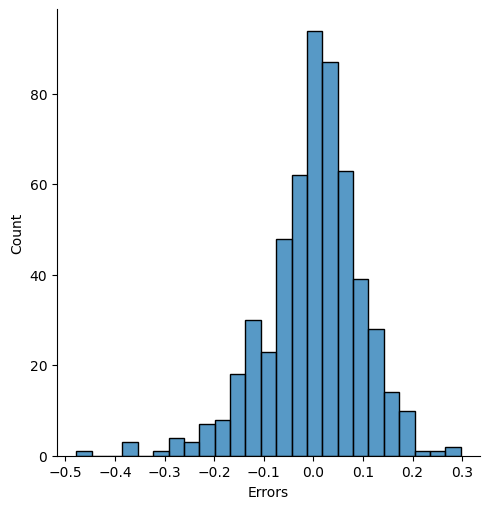

In [159]:
## Residual Analysis

X_train_lm = sm.add_constant(X_train_rfe)


## Residual Analysis
y_train_cnt = lm.predict(X_train_lm)


fig = plt.figure()
sns.displot((y_train - y_train_cnt), bins = 25)
plt.xlabel('Errors');

In [160]:
#Residuals are normally distributed. Hence our assumption for Linear Regression is True.

In [161]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
#Testing 
white_test = het_white(lm.resid,  lm.model.exog)
#Adding labels
names = ['Lagrange multiplier statistic', 'p-value','f-value', 'f p-value']
lzip(names,white_test)

[('Lagrange multiplier statistic', 116.67346568413387),
 ('p-value', 1.9064838749525892e-07),
 ('f-value', 2.750010051500983),
 ('f p-value', 1.576457094736284e-08)]

In [162]:
# Making Prediection

In [163]:
df_test[num_vars] = minMaxScaler.transform(df_test[num_vars])
y_test = df_test.pop('count')
X_test = df_test

In [164]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_lm = sm.add_constant(X_test_new)

Text(0, 0.5, 'y_pred')

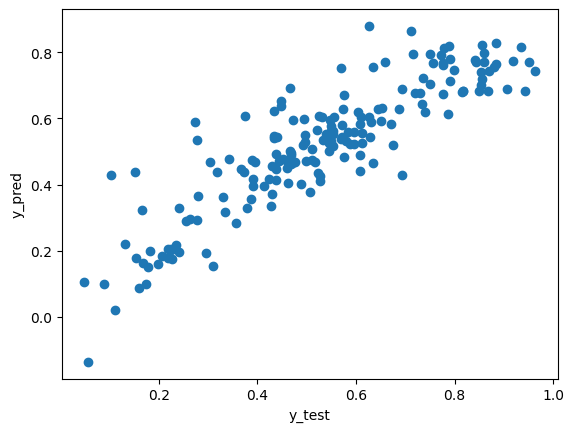

In [167]:
# Making Predictions
y_pred = lm.predict(X_test_lm)
# Plotting y_test and y_pred
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred')         
plt.xlabel('y_test') 
plt.ylabel('y_pred') 

In [170]:
from sklearn.metrics import r2_score
print("Test Model R2 Score: ",r2_score(y_test, y_pred))

Test Model R2 Score:  0.7703862239410495


In [172]:
print("Training Model R2 Score: ",r2_score(y_train, y_train_cnt))

Training Model R2 Score:  0.810128534966396


In [ ]:
#both model;s R2 score is close enough